In [3]:
import geopandas as gpd

import numpy as np
import pandas as pd
import os

In [4]:
data_dir = '/cluster/tufts/hugheslab/datasets/cook_county_me/'
csv_path = os.path.join(data_dir, '20230629_me_2014_to_present.csv')
me_shape_path = os.path.join(data_dir, '20230629_cookcounty')
tl_shape_path = os.path.join(data_dir, 'tl_2021_17_tract')

In [34]:
me_df = pd.read_csv(csv_path)
me_gdf = gpd.read_file(me_shape_path)
tl_gdf = gpd.read_file(tl_shape_path)
tl_gdf['deaths'] = 0
me_gdf.to_crs(tl_gdf.crs, inplace=True)

<Axes: >

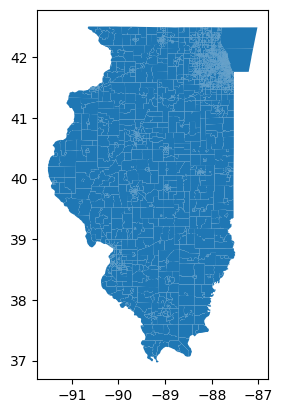

In [12]:
tl_gdf.plot()

In [22]:
one_death = me_gdf.iloc[0]

In [38]:
containing_tract_idx = tl_gdf.contains(one_death.geometry)

In [33]:
tl_gdf[containing_tract_idx]

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1248,17,031,670800,17031670800,6708,Census Tract 6708,G5020,S,326299,0,+41.7831442,-087.6618790,"POLYGON ((-87.66439 41.78675, -87.66415 41.786..."


In [54]:
missing_geo = 0
for d, death in me_gdf.iterrows():
    
    if death.geometry is None:
        missing_geo +=1
        continue
    
    
    containing_tract_idx = tl_gdf.contains(death.geometry)
    assert(containing_tract_idx.sum()==1)
    tl_gdf.loc[containing_tract_idx, 'deaths'] += 1

0
100
200
300
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1700
1800
1900
2000
2100
2300
2400
2500
2600
2700
2800
2900
3000
3100
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4800
4900
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7100
7200
7300
7400
7500
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10700
10800
10900
11100
11200
11400
11500
11600
11700
11800
11900
12000
12100


<Axes: >

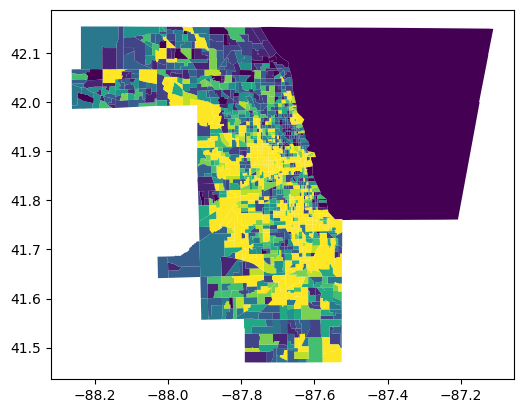

In [69]:
tl_gdf[tl_gdf['COUNTYFP']=='031'].plot('deaths',vmax=10)

In [60]:
tl_gdf[tl_gdf['COUNTYFP']=='031']['deaths'].sum()

11187

In [64]:
tl_gdf['deaths'].max()

138

In [63]:
tl_gdf.max()

TypeError: 'GeometryArray' with dtype geometry does not support reduction 'max'

1248    2
Name: deaths, dtype: int64